In [13]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

from convenience_functions import get_mnist

from NetworkModules.Network import Network
from NetworkModules.Layers import *
from NetworkModules.Activations import *
from NetworkModules.LossFunctions import *  


# MNIST Dataset

In [14]:
train_X, train_Y, test_X, test_Y = get_mnist("C:/Users/nisha/project_repositories/MNIST_from_scratch/MNIST_From_Scratch/dataset")


print(f'Train X shape = {train_X.shape}')
print(f'Train Y shape = {train_Y.shape}')
print(f'Test  X shape  = {test_X.shape}')
print(f'Test  Y shape  = {test_Y.shape}')


Train X shape = (60000, 784)
Train Y shape = (60000, 10)
Test  X shape  = (10000, 784)
Test  Y shape  = (10000, 10)


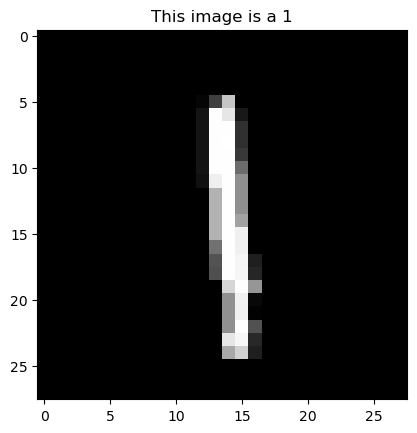

In [17]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 8
image = train_X[sample].reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title(f'This image is a {int(np.argwhere(train_Y[sample]== 1))}')
plt.show()

In [20]:
net = Network()
net.add_layer(FullyConnectedLinearLayer(784, 500))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(500, 300))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(300, 10))
net.add_layer(ActivationLayer(softmax, dsoftmax))

net.set_loss(cross_entropy_loss, dcross_entropy_loss)

net.load_data( train_X[0:60000,:].T, train_Y[0:60000,:].T, test_X[0:10000,:].T, test_Y[0:10000,:].T)

net._reinitalize_weights()

def accuracy_metric(X, Y):
    return (np.argmax(net.inference(X), axis=0) == np.argmax(Y, axis=0)).sum() / Y.shape[1] * 100

net.add_accurace_function(accuracy_metric)


net._mini_batch_Adam(learning_rate=0.001, epochs = 15, batch_size = 128, L2_reg = False, L2_lambda = 0.1, adaptive_learning_rate='scheduled', schedule_interval=5, decay_rate=0.3)



iter       Loss          learn rate      Train Accuracy        Val Accuracy
1          0.46               0.001               92.62               92.55
6          0.22             0.00077               94.65               94.03
11         0.21             0.00062                95.0               94.32
15         0.21             0.00062               94.99               94.25
Training Complete


In [32]:
total_parms = 0

for layer in net.layers:
    if isinstance(layer, FullyConnectedLinearLayer):
        total_parms += np.prod(layer.weights.shape) + np.prod(layer.biases.shape)


# Validation data where the model fails

wrong_examples = np.where(np.argmax(net.inference(test_X.T), axis=0) != np.argmax(test_Y.T, axis=0))[0]



print(f'This model has {total_parms} trained parameters')

This model has 545810 trained parameters


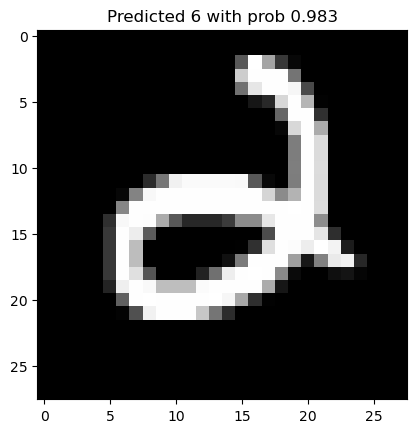

Apparantly this is 2


In [63]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = np.random.choice(wrong_examples, 1)
image = test_X[sample].reshape(28, 28)

example = test_X[sample].reshape(784, 1)
y_out= net.inference(example)

ind = np.argmax(y_out)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')

plt.title(f'Predicted {ind} with prob {round(float(y_out[ind]),3)}')
plt.show()

print(f'Apparantly this is {np.argmax(test_Y[sample])}')

In [28]:
1 / (1 + 0.3 * np.floor(201/50)) * 0.001
            

0.00045454545454545455

In [26]:



# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]]).T
y_train = np.array([[0], [1], [1], [0]]).T


net = Network()
net.add_layer(FullyConnectedLinearLayer(2, 3))
net.add_layer(ActivationLayer(tanh, dtanh))
net.add_layer(FullyConnectedLinearLayer(3, 1))
net.add_layer(ActivationLayer(tanh, dtanh))

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train)

net.add_accurace_function(mse_loss)

net._stochastic_gradient_descent(learning_rate=0.1, epochs=100)

iter       Loss      Train Accuracy        Val Accuracy


AttributeError: 'NoneType' object has no attribute 'any'

# Individual Assignment Data


In [15]:
from scipy.io import loadmat

dat = {}


# Vitor data
# NN_data = loadmat('dataset/NN_proj_data_10.mat', mdict = dat)

# Dan data
NN_data = loadmat('dataset/NN_proj_data_04.mat', mdict = dat)


# Dan data

In [16]:
x_train = dat['inp_train']
y_train = dat['y4']

x_valid = dat['inp_valid']
y_valid = dat['y4val']

net = Network()
net.add_layer(FullyConnectedLinearLayer(1, 50))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=False, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(50, 25))
net.add_layer(ActivationLayer(tanh, dtanh), dropout_layer=False, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(25, 1))


# net.add_layer(ActivationLayer(tanh, dtanh))

# net._reinitalize_weights()

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train, x_valid, y_valid)


def mse_accuracy(X, Y):
    return np.mean(np.power(net.inference(X) - Y, 2))

net.add_accurace_function(mse_accuracy)

net._mini_batch_Adam(learning_rate=0.001, epochs=500, batch_size = 16, L2_reg=False, L2_lambda=0.001, adaptive_learning_rate='no')



iter       Loss          learn rate      Train Accuracy        Val Accuracy
1           2.1               0.001                1.91                1.63
6          0.67               0.001                0.73                0.45
11          0.3               0.001                0.32                0.32
16         0.16               0.001                0.18                0.46
21          0.1               0.001                0.12                 0.6
26         0.07               0.001                0.08                 0.7
31         0.05               0.001                0.06                0.78
36         0.04               0.001                0.05                0.82
41         0.03               0.001                0.04                0.84
46         0.03               0.001                0.03                0.84
51         0.02               0.001                0.03                0.82
56         0.02               0.001                0.02                0.78
61         0

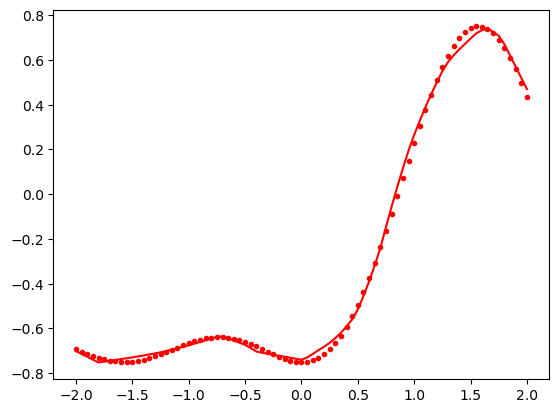

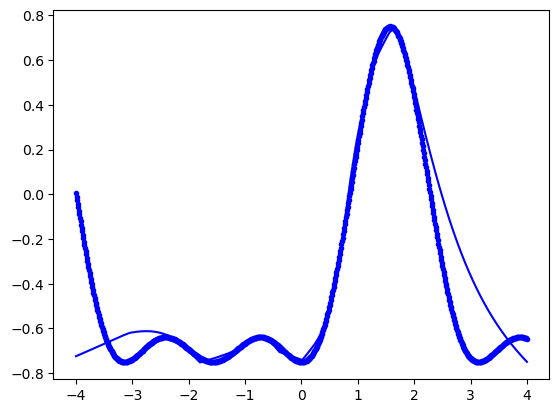

In [17]:
import matplotlib.pyplot as plt

plt.plot(x_train.T, y_train.T, 'r.')
plt.plot(x_train.T, net.inference(x_train).T, 'r')
plt.show()
plt.plot(x_valid.T, y_valid.T, 'b.')
plt.plot(x_valid.T, net.inference(x_valid).T, 'b')
plt.show()



In [ ]:
net.inference(x_valid)

In [18]:
np.array([1,2,3])**2

array([1, 4, 9])